<a href="https://colab.research.google.com/github/matthiasplum/CosmicRayML-Masterclass/blob/main/RNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

In [2]:
# Step 1: Generate Synthetic Data
def generate_waveform(length=1000):  # Adjust length as needed
    t = np.linspace(0, 4 * np.pi, length)  # Adjust frequency as needed
    waveform = np.sin(t)
    return waveform

def add_noise(waveform, noise_level=0.5):  # Adjust noise level as needed
    noise = np.random.normal(0, noise_level, waveform.shape)
    return waveform + noise

# Generate clean and noisy waveforms
clean_waveform = generate_waveform()
noisy_waveform = add_noise(clean_waveform)

Check out the data by plotting


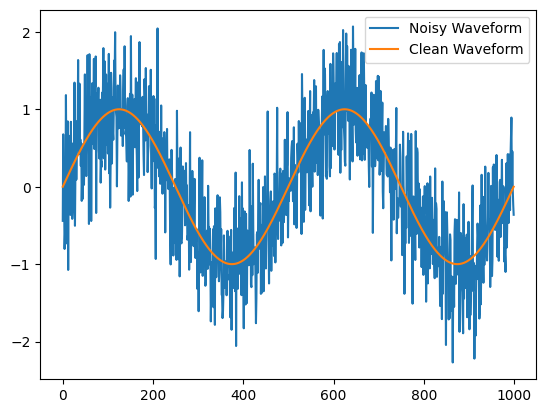

In [3]:
plt.plot(noisy_waveform,label='Noisy Waveform')
plt.plot(clean_waveform,label='Clean Waveform')
plt.legend()

Values you can change: Length of the test
sequence

In [4]:
# Step 2: Prepare the Data for the RNN
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 60  # Length of the sequence
X = create_sequences(noisy_waveform, seq_length)
y = create_sequences(clean_waveform, seq_length)

In [5]:
# Reshape data to fit RNN input format [samples, time steps, features]
X = X[..., np.newaxis]
y = y[..., np.newaxis]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Values you can change: RNN network shape, loss function optimizer and epoch number


In [6]:
# Step 3: Build and Train the RNN
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),  # Adjust RNN shape as needed
    Dense(1)                                                        # Output layer
])

model.compile(optimizer='adam', loss='mse')  # Use appropriate loss function and optimizer
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))  # Adjust epochs as needed

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
24/24 [==============================] - 5s 48ms/step - loss: 0.2256 - val_loss: 0.0969
Epoch 2/20
24/24 [==============================] - 1s 20ms/step - loss: 0.0994 - val_loss: 0.0815
Epoch 3/20
24/24 [==============================] - 1s 21ms/step - loss: 0.0790 - val_loss: 0.0656
Epoch 4/20
24/24 [==============================] - 1s 31ms/step - loss: 0.0596 - val_loss: 0.0553
Epoch 5/20
24/24 [====

In [7]:
# Step 4: Evaluate and Visualize the Results
# Generate clean and noisy test waveforms
clean_test_waveform = generate_waveform()
noisy_test_waveform = add_noise(clean_test_waveform)
X_testwaveform = create_sequences(noisy_test_waveform, seq_length)
X_testwaveform= X_testwaveform[..., np.newaxis]

cleaned_test_waveform = model.predict(X_testwaveform)

# Flatten the cleaned waveform
cleaned_test_waveform = cleaned_test_waveform.flatten()

30/30 [==============================] - 1s 5ms/step


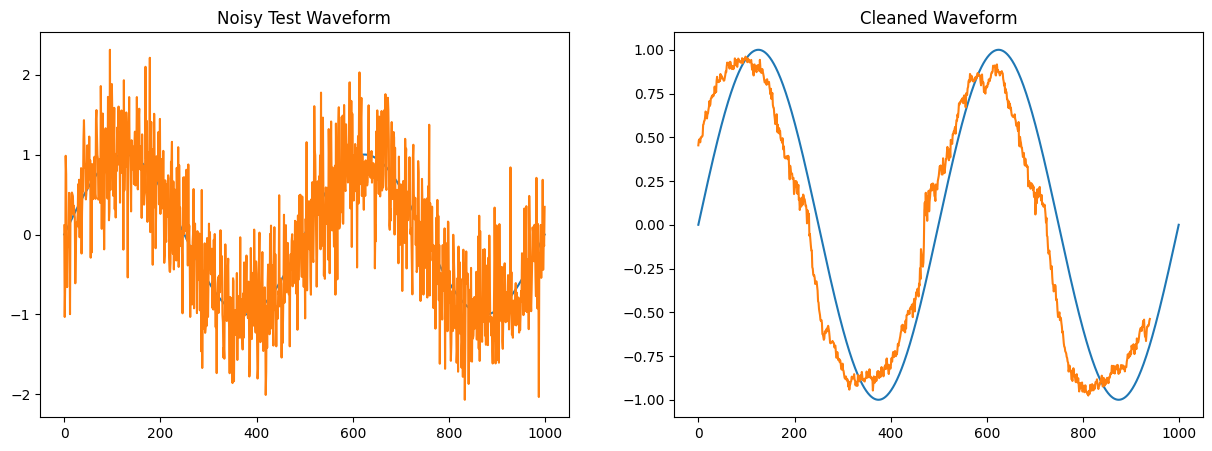

In [8]:
# Plotting the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
#plt.plot(noisy_waveform, label='Noisy Waveforms')
plt.plot(clean_waveform, label='Clean Waveform')
plt.plot(noisy_test_waveform, label='Noisy Test Waveform')
plt.title('Noisy Test Waveform')

plt.subplot(1, 2, 2)
plt.plot(clean_test_waveform, label='Clean Test Waveform')
plt.plot(cleaned_test_waveform, label='Cleaned Test Waveform')

plt.title('Cleaned Waveform')
#plt.legend()

plt.show()

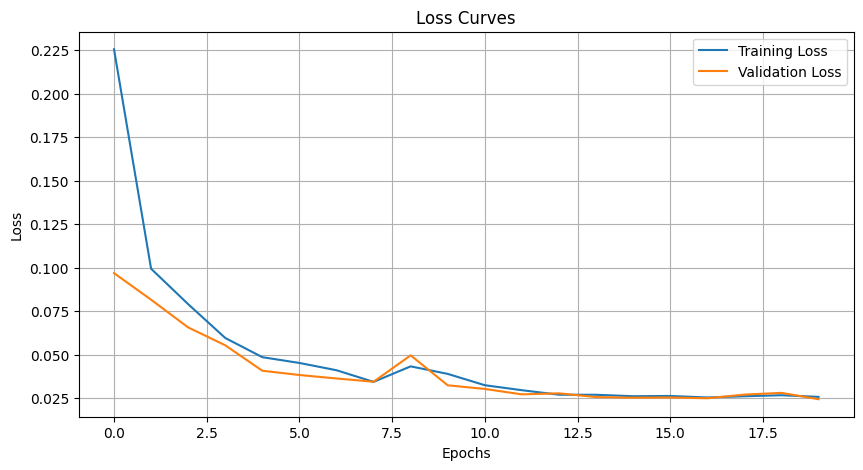

In [9]:
# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()